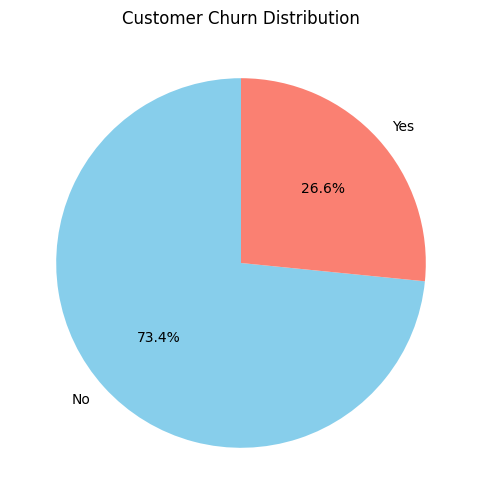

<ipython-input-2-88d9706c539f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='Monthly Charges', palette='coolwarm')


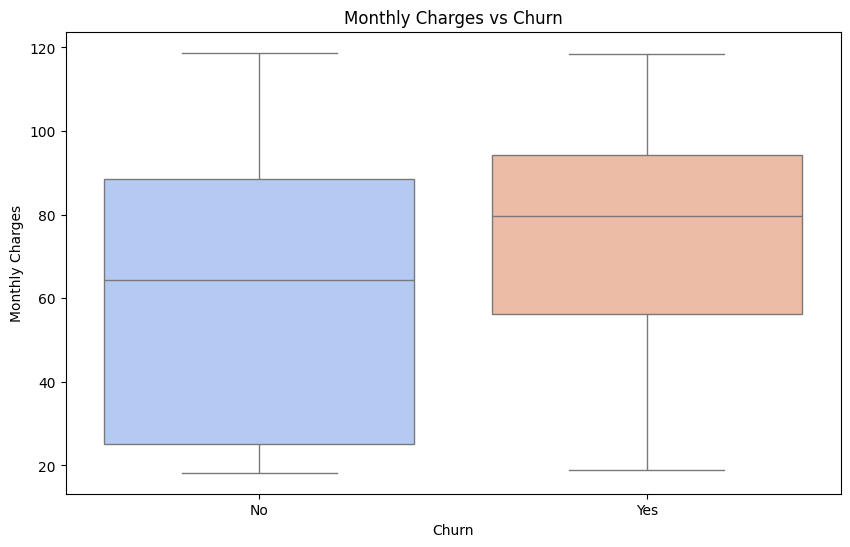

Model: Logistic Regression
[[914 119]
 [187 187]]
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1033
        True       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Model: Random Forest
[[943  90]
 [211 163]]
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:54:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
[[910 123]
 [186 188]]
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1033
        True       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Model: Decision Tree
[[875 158]
 [188 186]]
              precision    recall  f1-score   support

       False       0.82      0.85      0.83      1033
        True       0.54      0.50      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.75      0.75      0.75      1407



In [ ]:
# Capstone Project: Predicting Customer Churn in Telecom Industry

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load Dataset
data = pd.read_csv("sample_data/CustomerChurn.csv")

# Data Overview and Cleaning
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 6))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Customer Churn Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Monthly Charges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

# Encoding Categorical Variables and Splitting Data
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Features for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation Functions
def evaluate_model(model_name, model):
    model.fit(X_train_scaled if model_name in ['SVM', 'KNN'] else X_train, y_train)
    y_pred = model.predict(X_test_scaled if model_name in ['SVM', 'KNN'] else X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test_scaled if model_name in ['SVM', 'KNN'] else X_test)[:, 1])
    }
    print(f"Model: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return metrics

# Models to Evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Evaluate All Models and Store Results
results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model)

# Compare Model Performance
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print(results_df)

# Visualize Model Performance
results_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Model Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()
